In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"/content/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.shape

(255347, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df["Default"].value_counts()

,count
Default,
0,225694
1,29653


In [ ]:
df_numeric = df.select_dtypes(include= ["int64", "float64"])

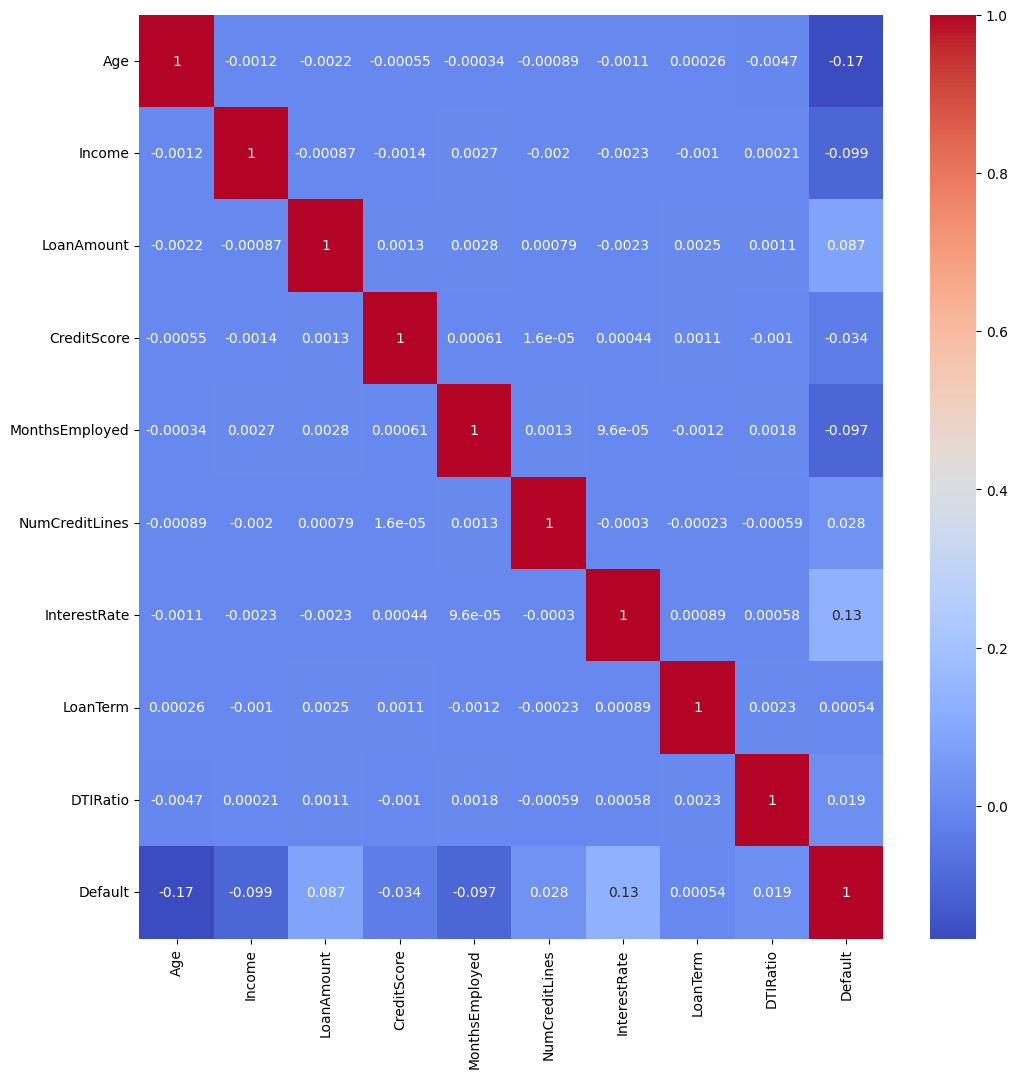

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_numeric.corr()

plt.figure(figsize=(12,12))

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df["credit/income"] = df["LoanAmount"] / df["Income"]
df["credit/income"].head()


# I created this label because it shows all the debt of a person rather than just the loan such DTIRatio.

,credit/income
0,0.588262
1,2.467481
2,1.534154
3,1.412638
4,0.447179


In [ ]:
df["credit/income"].describe()

,credit/income
count,255347.000000
mean,2.177480
std,2.178357
min,0.033749
25%,0.803628
50%,1.546720
75%,2.671744
max,16.532460


In [ ]:
df["credit/income_Q"] = pd.qcut(df["credit/income"], q= 4, labels = ["Low", "Medium", "High", "Very High"])
df["credit/income_Q"].head(10)

,credit/income_Q
0,Low
1,High
2,Medium
3,Medium
4,Low
5,Medium
6,High
7,Medium
8,High
9,High


<ipython-input-16-0f444b0db749>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax[plot_index].title.set_text(f'skewness: {df.groupby("credit/income_Q")[features].skew()}')
<ipython-input-16-0f444b0db749>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax[plot_index].title.set_text(f'skewness: {df.groupby("credit/income_Q")[features].skew()}')
<ipython-input-16-0f444b0db749>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

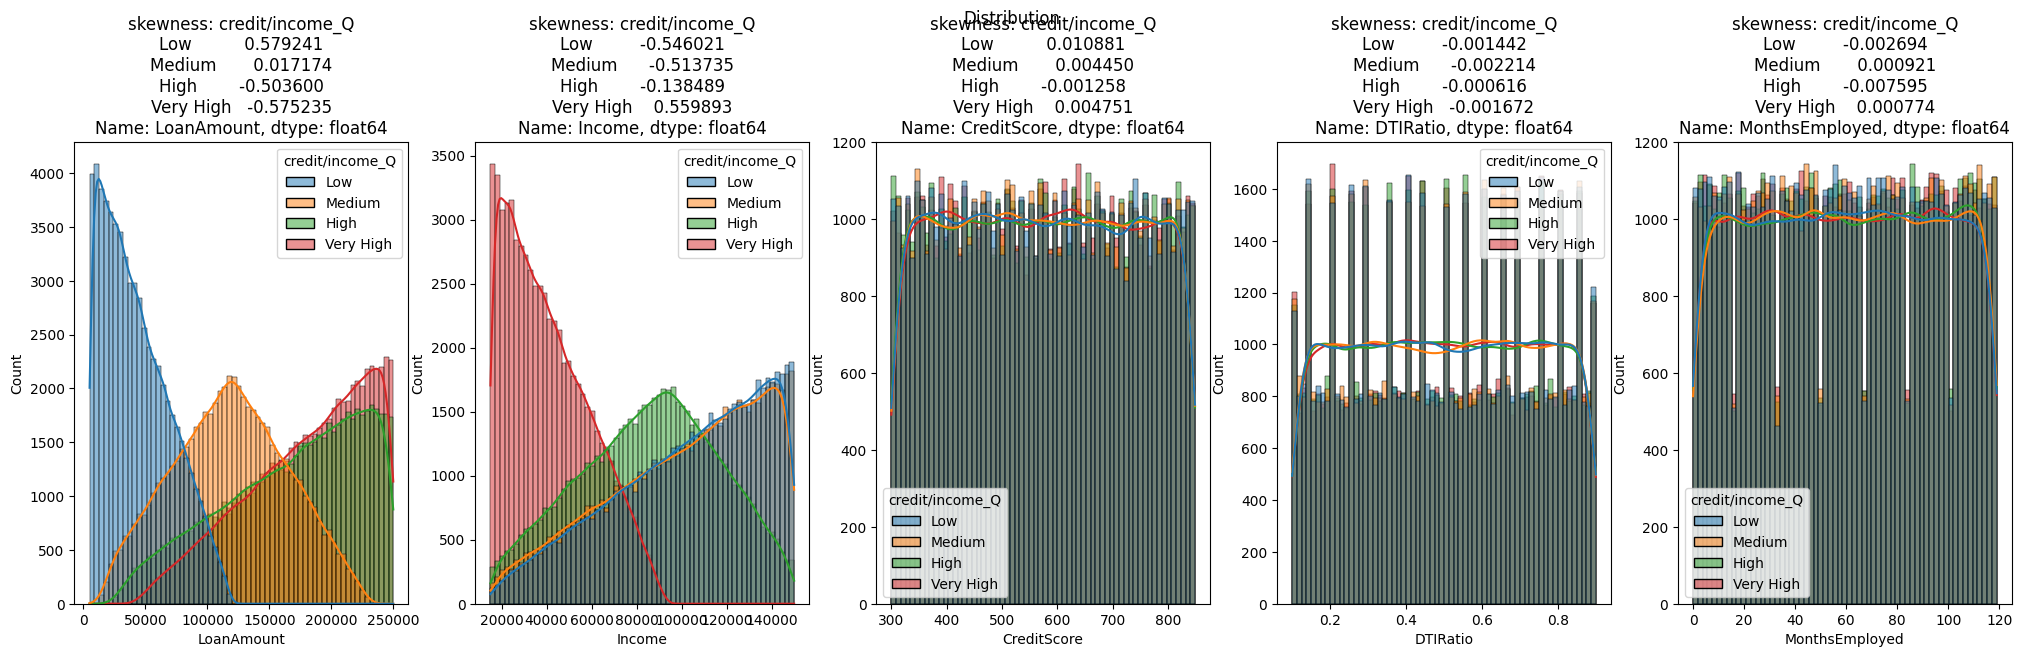

In [ ]:
num_features = ["LoanAmount", "Income", "CreditScore", "DTIRatio", "MonthsEmployed"]


fig, ax = plt.subplots(figsize = (25,6), nrows = 1, ncols = len(num_features))
for plot_index, features in enumerate(num_features):
    sns.histplot(x = df[features], hue = df["credit/income_Q"], kde = True, ax = ax[plot_index]);
    ax[plot_index].title.set_text(f'skewness: {df.groupby("credit/income_Q")[features].skew()}')
fig.suptitle("Distribution",fontsize=12, y=1.1)
plt.show();

<ipython-input-17-612f2b1b7295>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["credit/income"], labels=["Credit/Income"])


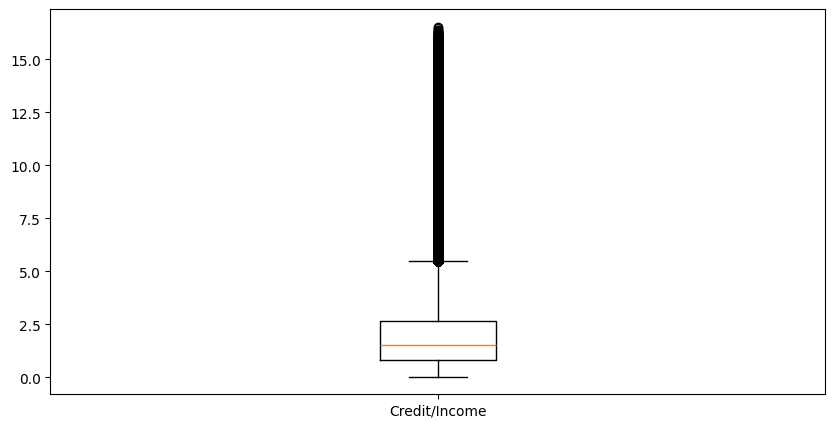

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(df["credit/income"], labels=["Credit/Income"])
plt.show()

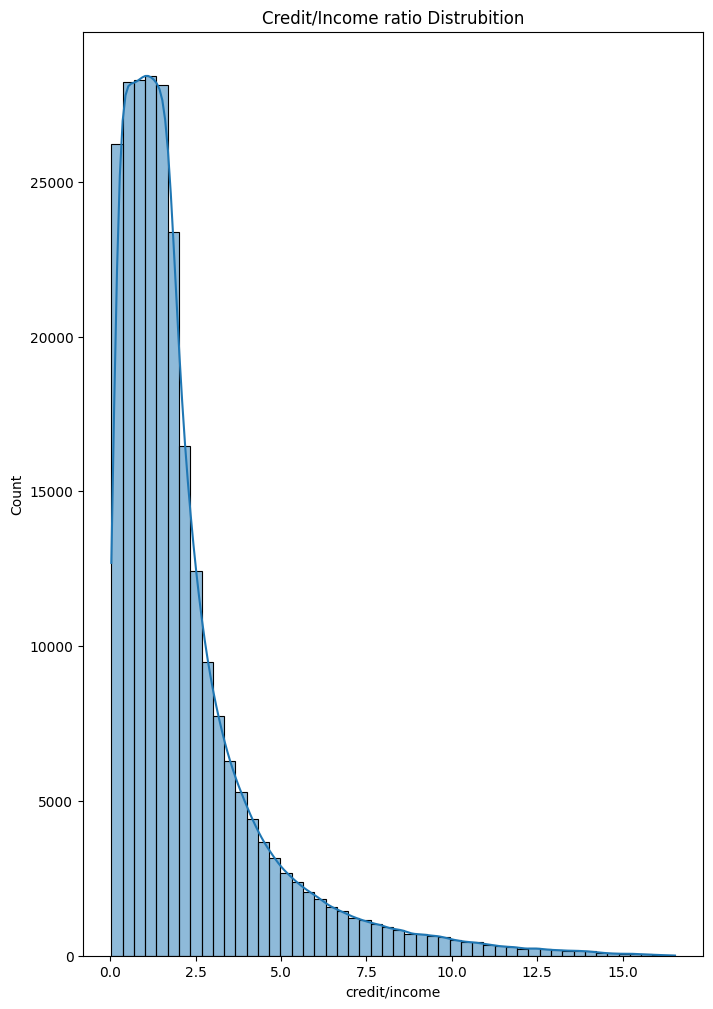

In [ ]:
plt.figure(figsize=(8,12))
sns.histplot(data=df["credit/income"], bins=50, kde=True)
plt.title("Credit/Income ratio Distrubition")
plt.show()

In [ ]:
df["credit/income"].sort_values(ascending=False).head(15)

,credit/income
183014,16.532460
8908,16.460600
211411,16.373211
52458,16.367200
79723,16.347420
116166,16.270092
189929,16.265257
178777,16.259815
162631,16.231061
132241,16.198039


In [ ]:
df["LoanPurpose"].value_counts()

,count
LoanPurpose,
Business,51298
Home,51286
Education,51005
Other,50914
Auto,50844


In [ ]:
df_new = df.drop(columns=["LoanID"], axis= 1)
df_new.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,credit/income,credit/income_Q
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.588262,Low
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,2.467481,High
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,1.534154,Medium
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,1.412638,Medium
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.447179,Low


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in df_new.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le


In [ ]:
df_new.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,credit/income,credit/income_Q
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,0.588262,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,2.467481,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,1.534154,2
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,1.412638,2
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,0.447179,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_new, columns= df_new.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=["Default"])
y = df_scaled["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Accuracy): {accuracy:.2f}")

Doğruluk (Accuracy): 0.69


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi (Confusion Matrix):")
print(conf_matrix)

Karışıklık Matrisi (Confusion Matrix):
[[31012 14127]
 [ 1813  4118]]


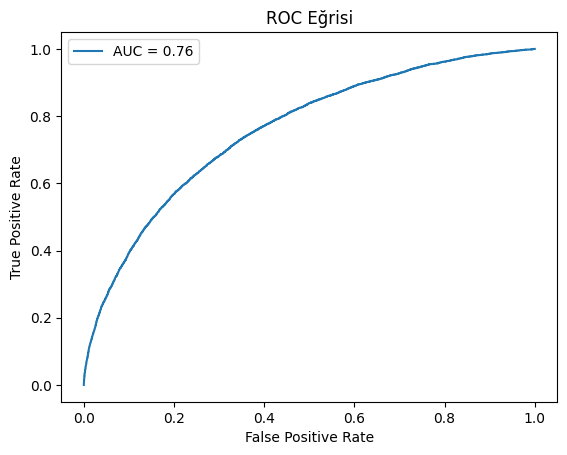

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi ve AUC değeri
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# ROC eğrisini çiz
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Veriyi ölçeklendirme (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eğitme
model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', C=0.1)
model.fit(X_train_scaled, y_train)

# Train ve Test Tahminleri
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Train ve Test Doğrulukları
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Sınıflandırma Raporları
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Sonuçları Yazdırma
print("=" * 50)
print(f"Train Doğruluk (Accuracy): {train_accuracy:.2f}")
print(f"Test Doğruluk (Accuracy): {test_accuracy:.2f}")
print("=" * 50)

print("\nTrain Sınıflandırma Raporu:")
print(train_report)

print("\nTest Sınıflandırma Raporu:")
print(test_report)

Train Doğruluk (Accuracy): 0.69
Test Doğruluk (Accuracy): 0.69

Train Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80    180555
           1       0.22      0.68      0.34     23722

    accuracy                           0.69    204277
   macro avg       0.58      0.69      0.57    204277
weighted avg       0.86      0.69      0.74    204277


Test Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     45139
           1       0.23      0.69      0.34      5931

    accuracy                           0.69     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.69      0.74     51070



In [ ]:
import pandas as pd

# Hedef değişkenin sınıf dağılımı
class_distribution = pd.Series(y_train).value_counts().to_frame()
class_distribution.columns = ['Sayı']
class_distribution['Yüzde'] = (class_distribution['Sayı'] / len(y_train)) * 100

print("Hedef Değişken Dağılımı:")
print(class_distribution)

Hedef Değişken Dağılımı:
           Sayı      Yüzde
Default                   
0        180555  88.387337
1         23722  11.612663


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling uygulama
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Yeni dağılımı kontrol etme
print(pd.Series(y_train_resampled).value_counts())

Default
0    23722
1    23722
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

model = LogisticRegression(max_iter=1000, C=0.01)
model.fit(X_train_balanced, y_train_balanced)

# Test verisi üzerinde değerlendirme
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     45139
           1       0.23      0.69      0.34      5931

    accuracy                           0.69     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.69      0.74     51070



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     45139
           1       0.43      0.15      0.22      5931

    accuracy                           0.88     51070
   macro avg       0.67      0.56      0.58     51070
weighted avg       0.84      0.88      0.85     51070



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

print("En iyi parametreler:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

En iyi parametreler: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.6981 - loss: 0.5735
Epoch 2/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7176 - loss: 0.5509
Epoch 3/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7234 - loss: 0.5437
Epoch 4/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7265 - loss: 0.5391
Epoch 5/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7313 - loss: 0.5349
Epoch 6/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7357 - loss: 0.5270
Epoch 7/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7447 - loss: 0.5137
Epoch 8/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7542 - loss: 0.4934
Epoch 9/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7605 - loss: 0.4820
Epoch 10/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7636 - loss: 0.4747


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_balanced,
    y_train_balanced,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.6873 - auc: 0.7243 - loss: 0.5822 - val_accuracy: 0.5682 - val_auc: 0.0000e+00 - val_loss: 0.7325
Epoch 2/50
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7137 - auc: 0.7655 - loss: 0.5533 - val_accuracy: 0.5565 - val_auc: 0.0000e+00 - val_loss: 0.7342
Epoch 3/50
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7174 - auc: 0.7698 - loss: 0.5492 - val_accuracy: 0.5637 - val_auc: 0.0000e+00 - val_loss: 0.7280
Epoch 4/50
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7179 - auc: 0.7719 - loss: 0.5473 - val_accuracy: 0.5639 - val_auc: 0.0000e+00 - val_loss: 0.7291
Epoch 5/50
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7208 - auc: 0.7757 - loss: 0.5439 - val_accuracy: 0.5784 - val_auc: 0.0000e+00 - val_loss: 0.7029
Epoch 6/50
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.7221 - auc: 0.7763 - loss: 0.5436 - val_accuracy: 0.5878 - val_auc: 0.0000e+00 - val_loss: 0.691

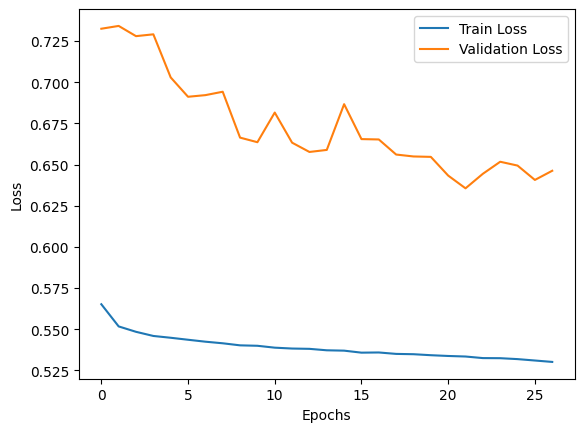

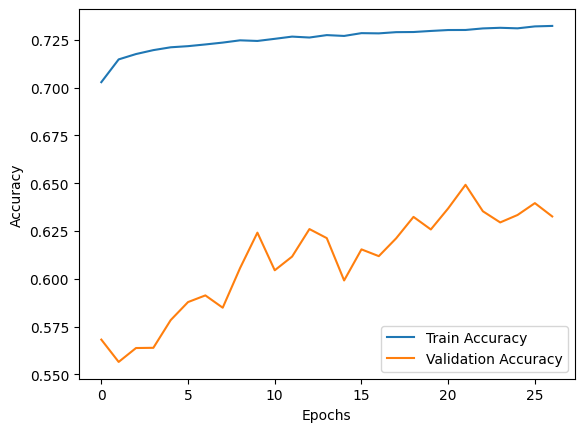

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Test Accuracy: 0.7623262189152145
ROC AUC: 0.7457862776770137

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85     45139
           1       0.26      0.55      0.35      5931

    accuracy                           0.76     51070
   macro avg       0.59      0.67      0.60     51070
weighted avg       0.85      0.76      0.80     51070

